In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np

In [ ]:
#Downloading Data
df = pd.read_csv('https://query.data.world/s/fwejs72gekxmyoyvcd2vxdshb3mn3s')
cdf = df[['year','temp','tempc']]
cdf.head(9)

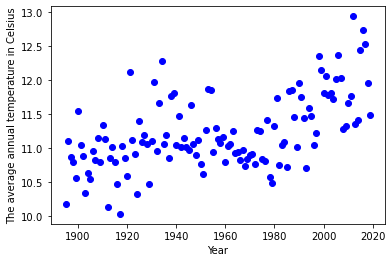

In [6]:
#Plotting Features
plt.scatter(cdf.year, cdf.tempc,  color='blue')
plt.xlabel("Year")
plt.ylabel("The average annual temperature in Celsius")
plt.show()

In [7]:
#Train and Test Separation
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [8]:
#Modeling
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['year']])
train_y = np.asanyarray(train[['tempc']])
regr.fit (train_x, train_y)

LinearRegression()

In [9]:
#The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[0.00674025]]
Intercept:  [-1.97306043]


Text(0, 0.5, 'The average annual temperature in Celsius')

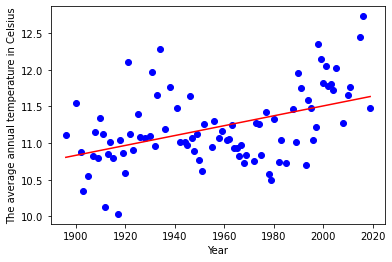

In [11]:
#Plot Output
plt.scatter(train.year, train.tempc,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Year")
plt.ylabel("The average annual temperature in Celsius")

In [14]:
#Evaluation
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[['year']])
test_y = np.asanyarray(test[['tempc']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_))

Mean absolute error: 0.38
Residual sum of squares (MSE): 0.23
R2-score: 0.43
